### DA Question 3: Product Popularity and Customer Background Analysis
- The banks would like to know what types of loan products are more popular in the market. Please analyze the data
and provide insights on what types of products are most popular. 
Do their popularities evolve w.r.t. time or vary with applicants' locations?
- Describe the distribution of aggregate loan application counts during the total time period, either by the banks or by t
the products. What are the characteristics of banks or products which have low loan applications?
- Identify the banks or individual products whose loan application volumes are growing fastest. Are there banks or products which
lose attractness to the customers?
- Among the banks who sell similar loan products, any pattern on the loan popularities and approval rates? 
- Different loan products potentially can attract different types of customers. Please analyze the user profiles of 
different loan products. Please provide an in-depth analysis on how different types of product may attract different types of users.
Notice that the grouping of product types or user types are subject to your own research.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
%matplotlib inline

In [2]:
df = pd.read_csv('../all_merged_data.csv')
df.drop(['reapply_count','is_p2p'],axis=1,inplace=True)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
df.columns

Index(['user_id', 'product_id', 'date_order', 'application_term', 'limit',
       'result', 'city_id_product', 'bank_id', 'product_type_product',
       'guarantee_type_product', 'loan_term_min', 'loan_term_max',
       'loan_term_type', 'decision_cycle', 'loan_cycle', 'repayment_type',
       'loan_quota_min', 'loan_quota_max', 'interest_rate_type',
       'guarantee_required', 'standard_type_product', 'apply_num',
       'fangkuan_num', 'id', 'house_register', 'business_license',
       'legal_person', 'married', 'car', 'income', 'house', 'tax',
       'socialsecurity', 'bank', 'lifecost', 'early_repayment', 'penalty',
       'pv', 'pv_index_loan', 'pv_apply_total', 'pv_ask', 'pv_calculator',
       'order_count_loan', 'pv_daikuan', 'pv_credit', 'pv_search_daikuan',
       'pv_detail_daikuan', 'date_user', 'city_id_quality', 'application_type',
       'application_limit', 'op_type', 'col_type', 'user_loan_experience',
       'user_has_car', 'user_social_security', 'qid77', 'cash_rece

In [4]:
df.sample(20)

,user_id,product_id,date_order,application_term,limit,result,city_id_product,bank_id,product_type_product,guarantee_type_product,loan_term_min,loan_term_max,loan_term_type,decision_cycle,loan_cycle,repayment_type,loan_quota_min,loan_quota_max,interest_rate_type,guarantee_required,standard_type_product,apply_num,fangkuan_num,id,house_register,business_license,legal_person,married,car,income,house,tax,socialsecurity,bank,lifecost,early_repayment,penalty,pv,pv_index_loan,pv_apply_total,pv_ask,pv_calculator,order_count_loan,pv_daikuan,pv_credit,pv_search_daikuan,pv_detail_daikuan,date_user,city_id_quality,application_type,application_limit,op_type,col_type,user_loan_experience,user_has_car,user_social_security,qid77,cash_receipts,user_income_by_card,user_work_period,user_age,company_type,col_value,com_op_period,com_month_flow,qid123,qid122,qid135,qid139,qid93,qid57,cash_settlement,user_nationality,qid145,house_payment_records,car_value,qid137,qid133,qid140,qid78,loan_term,qid79,col_has_mortgage,qid146,loan_limit_n,op_type_n,col_type_n,user_loan_experience_n,user_has_car_n,user_social_security_n,qid77_n,cash_receipts_n,user_income_by_card_n,user_work_period_n,user_age_n,company_type_n,col_value_n,com_op_period_n,com_month_flow_n,qid123_n,qid122_n,qid135_n,qid139_n,qid93_n,qid57_n,user_nationality_n,qid145_n,house_payment_records_n,car_value_n,qid133_n,qid140_n,qid78_n,loan_description_n,loan_term_n,qid79_n,car_use_requirement_n,col_has_mortgage_n,qid146_n,product_type_quality,apply_from,platform,spam_score,mobile_verify,source,medium,is_paid,quality,mobile_source,mobile_medium,mobile_is_paid,mobile_quality,standard_type_quality,guarantee_type_quality,counts
118222,8e23ba109e8b26cb8e908a146e990fe9,f064641742a3c1ebd265aaf4314bab5d,1244,30,196.0,0,c4ca4238a0b923820dcc509a6f75849b,6ea9ab1baa0efb9e19094440c317e21b,5,0,12,360,1,2,7,1,300000,20000000,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,NaN,NaN,6.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,161.0,c4ca4238a0b923820dcc509a6f75849b,4.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,1.0,0.0,2.0,8.0,202.0,0.0,1.0,21.0,97.0,0.0,1.0,1.0,0.0,6.0
224609,4691eabf5d59548c69d332366c0673e3,abf76b06f8a322e62a5de8c70d3749e7,1397,12,14.0,0,54229abfcfa5649e7003b83dd4755294,c9de64b0aa92114521bfc07918df7b47,6,2,3,36,1,3,3,1,10000,300000,0,0,1,25,1,1,1,0,0,0,0,0,1,0,1,1,0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,310.0,54229abfcfa5649e7003b83dd4755294,2.0,14.0,4.0,0.0,1.0,5.0,0.0,3.0,8000.0,8000.0,48.0,42.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,21.0,1.0,0.0,0.0,64.0,150.0,0.0,1.0,167.0,189.0,NaN,NaN,1.0,2.0,6.0
125141,1f85053893a786f15854b84e35bd3cf7,b73ce398c39f506af761d2277d853a92,1266,12,5.0,0,c81e728d9d4c2f636f067f89cc14862c,7f39f8317fbdb1988ef4c628eba02591,6,2,12,48,1,1,2,1,50000,500000,0,0,1,3206,477,1,0,0,0,0,0,0,1,0,0,0,0,1.0,1.0,5.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0.0,2.0,161.0,c81e728d9d4c2f636f067f89cc14862c,9.0,5.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,6.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,1.0,50.0,2.0,8.0,115.0,0.0,1.0,167.0,189.0,NaN,NaN,1.0,2.0,6.0
964,555ff62d90eb43f5d86b6590a8a23b20,bf8229696f7a3bb4700cfddef19fa23f,768,36,56.0,0,c81e728d9d4c2f636f067f89cc14862c,fc490ca45c00b1249bbe3554a4fdf6fb,6,1,12,120,1,4,5,1,300000,10000000,0,1,1,1168,327,1,0,0,0,1,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c81e728d9d4c2f636f067f89cc14862c,3.0,56.0,NaN,NaN,NaN,NaN,NaN,Na

The banks would like to know what types of loan products are more popular in the market. 
Please analyze the data and provide insights on what types of products are most popular. 
Do their popularities evolve w.r.t. time or vary with applicants' locations?

## Looking at most popular product ID's and product types based on number of applications

In [4]:
df['counts'] = df['counts'].fillna(1)
product_ids_grouped = df.groupby('product_id').agg({'counts':'sum'})
product_type_products_grouped = df.groupby('product_type_product').agg({'counts':'sum'})
product_type_quality_grouped = df.groupby('product_type_quality').agg({'counts':'sum'})

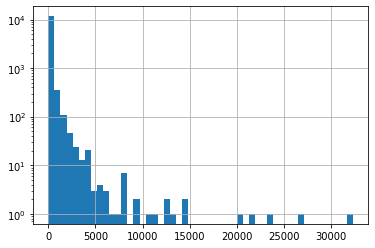

In [6]:
product_ids_grouped['counts'].hist(bins=50, log=True)

The histogram above shows the counts for different product IDs. It's clearly skewed, with most having less than 5000 application counts, while very few have more than 10000.

## Product Types

Below we look at the product types associated with the "product" table, and the product type associated with the "quality" table. The most common are "100" and "6" for the product, and "1" and "2" for the quality. The least popular are "101" and "102", and "102", respsectively.

In [7]:
product_type_products_grouped['counts'].sort_values()

product_type_product
101        256.0
102        503.0
4         4128.0
2         7920.0
3        16081.0
5        57701.0
1       176893.0
100     798199.0
6      1017683.0
Name: counts, dtype: float64

In [8]:
product_type_quality_grouped['counts'].sort_values()

product_type_quality
102.0         36.0
0.0         6068.0
5.0         6316.0
100.0      11874.0
3.0        17437.0
6.0        39765.0
4.0        49148.0
1.0       248457.0
2.0      1686479.0
Name: counts, dtype: float64

Below, try to see if there's an association between the product and quality product types, but there isn't much

In [9]:
print(df.loc[df['product_type_product']==6]['product_type_quality'].value_counts())
print(df.loc[df['product_type_product']==6]['product_id'].nunique())

2.0    164970
1.0     14106
6.0      3690
4.0      3365
3.0       288
5.0        12
Name: product_type_quality, dtype: int64
2651


In [10]:
print(df.loc[df['product_type_product']==100]['product_type_quality'].value_counts())
print(df.loc[df['product_type_product']==100]['product_id'].nunique())

2.0      104113
1.0       15472
4.0        4818
6.0        3530
3.0        1846
100.0      1794
5.0         969
0.0         112
Name: product_type_quality, dtype: int64
7971


100    15472
6      14106
5       9448
1       4720
3        744
4        437
102        6
101        3
Name: product_type_product, dtype: int64
2104


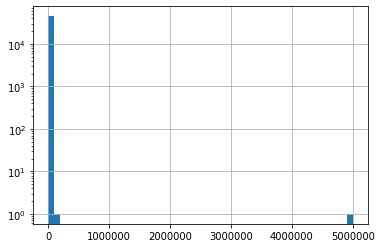

In [11]:
print(df.loc[df['product_type_quality']==1]['product_type_product'].value_counts())
print(df.loc[df['product_type_quality']==1]['product_id'].nunique())
df.loc[df['product_type_quality']==1].limit.hist(bins=50,log=True)

In [12]:
print(df.loc[df['product_type_quality']==2]['product_type_product'].value_counts())
print(df.loc[df['product_type_quality']==2]['product_id'].nunique())

6      164970
100    104113
1       26733
2        1514
3        1034
4         267
102        66
101        32
Name: product_type_product, dtype: int64
9305


## popular product IDs
Here we see that the most popular products, by ID, are all of product type "6" for the "product", and are either 2,4,or 6 of the "quality" product type

6    37986
Name: product_type_product, dtype: int64
2.0    37546
6.0      431
4.0        9
Name: product_type_quality, dtype: int64
e07bceab69529b0f0b43625953fbf2a0    5980
02180771a9b609a26dcea07f272e141f    4673
dc20d1211f3e7a99d775b26052e0163e    4334
2723d092b63885e0d7c260cc007e8b9d    3784
70efdf2ec9b086079795c442636b55fb    3714
8cbd005a556ccd4211ce43f309bc0eac    2534
42d6c7d61481d1c21bd1635f59edae05    2459
204da255aea2cd4a75ace6018fad6b4d    2358
2bc8ae25856bc2a6a1333d1331a3b7a6    2183
1f0e3dad99908345f7439f8ffabdffc4    2120
bd686fd640be98efaae0091fa301e613    2015
202cb962ac59075b964b07152d234b70    1832
Name: product_id, dtype: int64


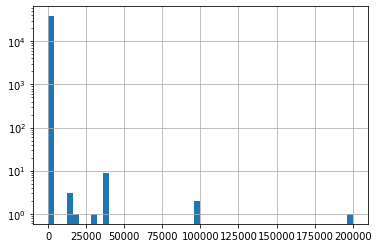

In [13]:
print(df.loc[df['product_id'].isin(product_ids_grouped.\
        loc[product_ids_grouped['counts'] > 10000].index)]['product_type_product'].\
        value_counts())
print(df.loc[df['product_id'].isin(product_ids_grouped.\
        loc[product_ids_grouped['counts'] > 10000].index)]['product_type_quality'].\
        value_counts())
print(df.loc[df['product_id'].isin(product_ids_grouped.\
        loc[product_ids_grouped['counts'] > 10000].index)]['product_id'].\
        value_counts())
df.loc[df['product_id'].isin(product_ids_grouped.\
        loc[product_ids_grouped['counts'] > 10000].index)]['limit'].\
        hist(bins=50, log=True)

## unpopular product IDs
These values show no distinct pattern

100    3012
6       629
1       277
5       115
3        29
102      12
4         7
101       4
2         1
Name: product_type_product, dtype: int64
2.0      1693
1.0       351
4.0       184
3.0        37
100.0      35
6.0        27
0.0         7
5.0         7
Name: product_type_quality, dtype: int64


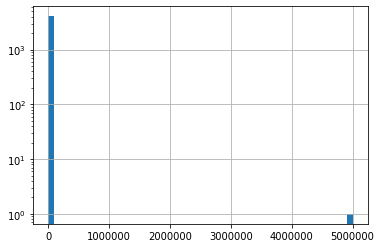

In [14]:
print(df.loc[df['product_id'].isin(product_ids_grouped.\
        loc[product_ids_grouped['counts'] < 10].index)]['product_type_product'].\
        value_counts())
print(df.loc[df['product_id'].isin(product_ids_grouped.\
        loc[product_ids_grouped['counts'] < 10].index)]['product_type_quality'].\
        value_counts())
df.loc[df['product_id'].isin(product_ids_grouped.\
        loc[product_ids_grouped['counts'] < 10].index)]['limit'].hist(bins=50, log=True)

## same city?

In [15]:
df['same_city'] = (df['city_id_product'] == df['city_id_quality'])*1

In [16]:
df.loc[df['same_city']==1].result.mean()

0.14982516496531498

In [17]:
df.loc[df['same_city']==0].result.mean()

0.11849876166888931

In [16]:
popular_products = df.loc[df['product_id'].isin(product_ids_grouped.\
        loc[product_ids_grouped['counts'] > 10000].index)]

In [41]:
unpopular_products = df.loc[~df['product_id'].isin(product_ids_grouped.\
        loc[product_ids_grouped['counts'] < 10000].index)]

In [12]:
nonobject_columns = df.columns[df.dtypes != object]

In [13]:
object_columns = df.columns[df.dtypes == object]
object_columns

Index(['user_id', 'product_id', 'city_id_product', 'bank_id',
       'city_id_quality'],
      dtype='object')

In [14]:
smaller_categoricals_columns = []
numerical_columns = []
for colname in nonobject_columns:
    if df[colname].nunique() <= 5:
        smaller_categoricals_columns.append(colname)
    else:
        numerical_columns.append(colname)

In [23]:
len(smaller_categoricals_columns)

70

In [24]:
len(numerical_columns)

60

/Users/jen/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jen/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


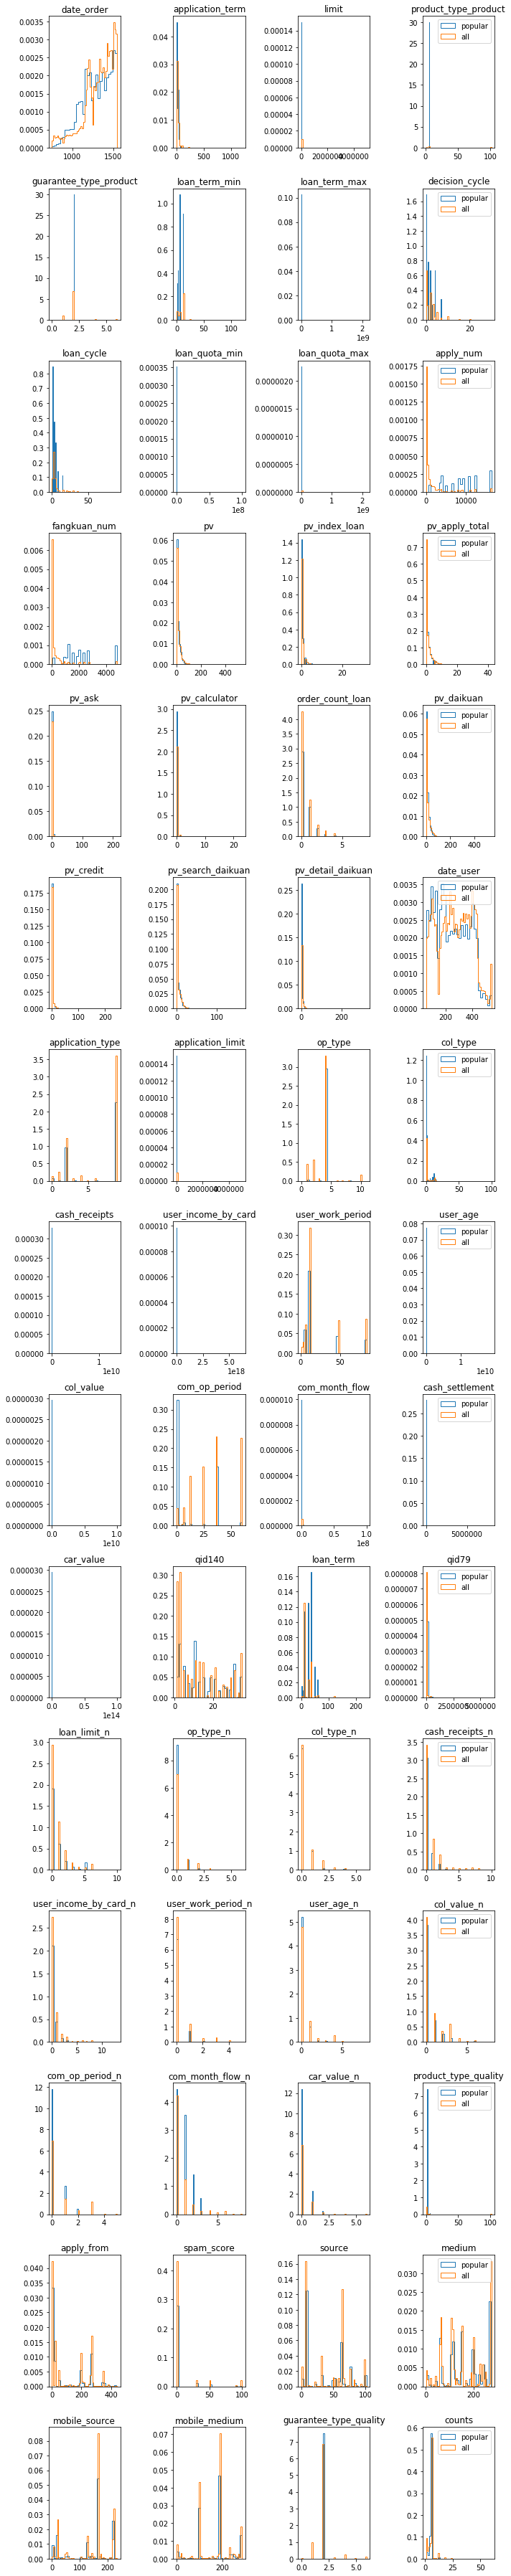

In [17]:
plt.rcParams["figure.figsize"] = (10,50)
for i, colname in enumerate(numerical_columns):
    plt.subplot(15,4,i+1)
    plt.title(colname)
  #  if unpopular_products[colname].notna().sum() != 0:
   #     plt.hist(unpopular_products[colname], bins=30, histtype='step',log=1,  density=1, label="unpopular")
    if popular_products[colname].notna().sum() != 0:
        plt.hist(popular_products[colname],bins=30, histtype='step', log=False, density=True,label="popular")
    plt.hist(df[colname],bins=50, histtype='step', log=False, density=True, label="all")
    if (i+1)%4==0: plt.legend()
plt.tight_layout()

In [42]:
popular_dict = {}
for colname in smaller_categoricals_columns:
    print(colname)
    contingency_table = pd.concat([popular_products[colname].value_counts().rename("popular"), 
                     df[colname].value_counts().rename("all")], axis=1).fillna(0)
    print(pd.concat([popular_products[colname].value_counts(normalize=True).rename("popular"), 
                     unpopular_products[colname].value_counts(normalize=True).rename("unpopular"),
                    df[colname].value_counts(normalize=True).rename("all")], axis=1))
    popular_dict[colname] = chi2_contingency(contingency_table)[1]

#popular_contingencies = pd.Series(popular_contingencies)

result
    popular  unpopular       all
0  0.679303   0.679303  0.852334
1  0.320697   0.320697  0.147666
loan_term_type
    popular  unpopular      all
1  0.607434   0.607434  0.66109
2  0.392566   0.392566  0.33891
repayment_type
   popular  unpopular       all
0      NaN        NaN  0.360734
1      1.0        1.0  0.600554
2      NaN        NaN  0.024116
3      NaN        NaN  0.014596
interest_rate_type
    popular  unpopular       all
0  0.784342   0.784342  0.915831
1       NaN        NaN  0.000252
2  0.215658   0.215658  0.083917
guarantee_required
   popular  unpopular       all
0      1.0        1.0  0.994615
1      NaN        NaN  0.005385
standard_type_product
   popular  unpopular       all
1      1.0        1.0  0.639332
2      NaN        NaN  0.360668
id
    popular  unpopular       all
1  0.946954   0.946954  0.631171
0  0.053046   0.053046  0.368829
house_register
   popular  unpopular      all
0  0.60546    0.60546  0.85325
1  0.39454    0.39454  0.14675
business_licen

In [43]:
contingencies = pd.DataFrame(pd.Series(popular_dict), columns=["popular/unpopular"])

In [44]:
contingencies

,popular/unpopular
result,0.000000e+00
loan_term_type,8.186984e-98
repayment_type,0.000000e+00
interest_rate_type,0.000000e+00
guarantee_required,2.219393e-46
...,...
quality,1.079447e-174
mobile_is_paid,8.088667e-01
mobile_quality,2.579817e-53
standard_type_quality,0.000000e+00


## Accepted Vs Rejected 

In [45]:
accepted = df.loc[df['result']==1]
rejected = df.loc[df['result']==0]

/Users/jen/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jen/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


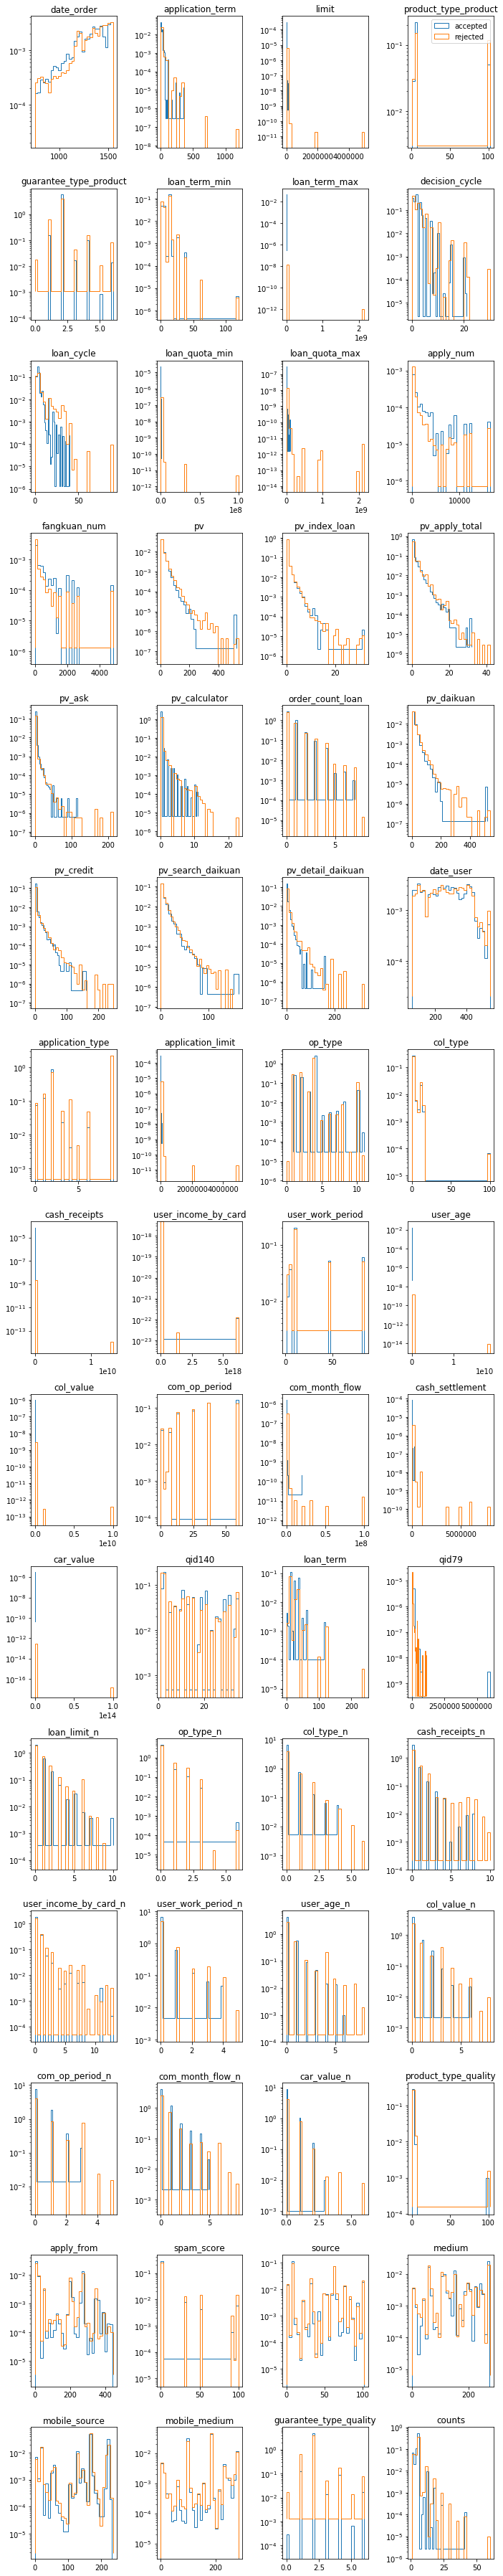

In [46]:
plt.rcParams["figure.figsize"] = (10,50)
for i, colname in enumerate(numerical_columns):
    plt.subplot(15,4,i+1)
    plt.title(colname)
    if accepted[colname].notna().sum() != 0:
        plt.hist(accepted[colname], bins=30, histtype='step', log=5, density=True, label="accepted")
    if rejected[colname].notna().sum() != 0:
        plt.hist(rejected[colname],bins=30, histtype='step', log=5, density=True, label="rejected")
   # plt.hist(df[colname],bins=50, histtype='step', density=True,label="all")
    if i==3: plt.legend()
plt.tight_layout()

In [48]:
result_dict = {}
for colname in smaller_categoricals_columns:
    print(colname)
    print(pd.concat([accepted[colname].value_counts(normalize=1).rename("accepted"), 
            rejected[colname].value_counts(normalize=True).rename("rejected")], axis=1))
    contingency_table = pd.concat([accepted[colname].value_counts().rename("accepted"), 
                     rejected[colname].value_counts().rename("rejected")], axis=1).fillna(0)
    result_dict[colname] = chi2_contingency(contingency_table)[1]

result
   accepted  rejected
0       NaN       1.0
1       1.0       NaN
loan_term_type
   accepted  rejected
1  0.478725  0.692684
2  0.521275  0.307316
repayment_type
   accepted  rejected
1  0.812148  0.563895
0  0.169414  0.393880
2  0.014064  0.025858
3  0.004374  0.016367
interest_rate_type
   accepted  rejected
0  0.873117  0.923231
2  0.126847  0.076479
1  0.000036  0.000290
guarantee_required
   accepted  rejected
0  0.998862  0.993879
1  0.001138  0.006121
standard_type_product
   accepted  rejected
1  0.830657  0.606184
2  0.169343  0.393816
id
   accepted  rejected
1  0.820505  0.598369
0  0.179495  0.401631
house_register
   accepted  rejected
0  0.872477  0.849919
1  0.127523  0.150081
business_license
   accepted  rejected
0   0.88656  0.878684
1   0.11344  0.121316
legal_person
   accepted  rejected
0  0.992141  0.986212
1  0.007859  0.013788
married
   accepted  rejected
0  0.897512  0.847125
1  0.102488  0.152875
car
   accepted  rejected
0  0.847051  0.872431
1  0.15

In [56]:
contingencies = pd.concat([contingencies, pd.Series(result_dict, name='accept/reject')],
                          axis=1)

In [57]:
contingencies

,popular/unpopular,accept/reject
result,0.000000e+00,0.000000e+00
loan_term_type,8.186984e-98,0.000000e+00
repayment_type,0.000000e+00,0.000000e+00
interest_rate_type,0.000000e+00,4.161948e-286
guarantee_required,2.219393e-46,1.122448e-10
...,...,...
quality,1.079447e-174,5.702201e-10
mobile_is_paid,8.088667e-01,6.726758e-01
mobile_quality,2.579817e-53,2.111854e-02
standard_type_quality,0.000000e+00,0.000000e+00


In [55]:
result_dict = {}
for colname in smaller_categoricals_columns:
    contingency_table = pd.concat([accepted[colname].value_counts().rename("accepted"), 
                     popular_products[colname].value_counts().rename("rejected")], axis=1).fillna(0)
    result_dict[colname] = chi2_contingency(contingency_table)[1]

In [58]:
contingencies = pd.concat([contingencies, pd.Series(result_dict, name="popular/accept")], 
                          axis=1)

In [65]:
contingencies = contingencies.round(decimals=4)

In [61]:
(contingencies > 0.05).T

,result,loan_term_type,repayment_type,interest_rate_type,guarantee_required,standard_type_product,id,house_register,business_license,legal_person,married,car,income,house,tax,socialsecurity,bank,lifecost,early_repayment,penalty,user_loan_experience,user_has_car,user_social_security,qid77,company_type,qid123,qid122,qid135,qid139,qid93,qid57,user_nationality,qid145,house_payment_records,qid137,qid133,qid78,col_has_mortgage,qid146,user_loan_experience_n,user_has_car_n,user_social_security_n,qid77_n,company_type_n,qid123_n,qid122_n,qid135_n,qid139_n,qid93_n,qid57_n,user_nationality_n,qid145_n,house_payment_records_n,qid133_n,qid140_n,qid78_n,loan_description_n,loan_term_n,qid79_n,car_use_requirement_n,col_has_mortgage_n,qid146_n,platform,mobile_verify,is_paid,quality,mobile_is_paid,mobile_quality,standard_type_quality,same_city
popular/unpopular,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
accept/reject,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False
popular/accept,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False


In [67]:
contingencies.to_csv('contingency_pvals.csv', index=True)

In [78]:
contingencies.index[(contingencies.T <= 0.05).all()]

Index(['result', 'loan_term_type', 'repayment_type', 'interest_rate_type',
       'guarantee_required', 'standard_type_product', 'id', 'house_register',
       'business_license', 'legal_person', 'married', 'car', 'income', 'house',
       'tax', 'socialsecurity', 'bank', 'lifecost', 'early_repayment',
       'penalty', 'user_loan_experience', 'user_has_car',
       'user_social_security', 'qid77', 'company_type', 'qid123', 'qid122',
       'qid135', 'qid139', 'qid93', 'qid57', 'user_nationality', 'qid145',
       'house_payment_records', 'qid137', 'qid133', 'user_loan_experience_n',
       'user_has_car_n', 'user_social_security_n', 'qid77_n', 'company_type_n',
       'qid123_n', 'qid122_n', 'qid135_n', 'qid139_n', 'qid93_n', 'qid57_n',
       'user_nationality_n', 'qid145_n', 'house_payment_records_n', 'qid133_n',
       'qid140_n', 'qid78_n', 'loan_term_n', 'qid79_n', 'col_has_mortgage_n',
       'qid146_n', 'platform', 'mobile_verify', 'is_paid', 'quality',
       'mobile_quality',